In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

seed = 13

# 随机森林分类器

In [40]:
iris_dataset = load_iris()

X, y = iris_dataset['data'], iris_dataset['target']

X = pd.DataFrame(X, columns = iris_dataset['feature_names'])
y = pd.DataFrame(y, columns = ['Type'])

iris_df = X.join(y)

iris_df = iris_df[iris_df['Type'] != 0]
iris_df = iris_df.drop(['sepal width (cm)', 'petal length (cm)'], axis = 1)

iris_df['petal width (cm)'] = iris_df.apply(lambda row : row['petal width (cm)'] + 0.15 if row['Type'] == 1 else row['petal width (cm)'], axis = 1)

iris_df

,sepal length (cm),petal width (cm),Type
50,7.0,1.55,1
51,6.4,1.65,1
52,6.9,1.65,1
53,5.5,1.45,1
54,6.5,1.65,1
...,...,...,...
145,6.7,2.30,2
146,6.3,1.90,2
147,6.5,2.00,2
148,6.2,2.30,2


## 二特征预测

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

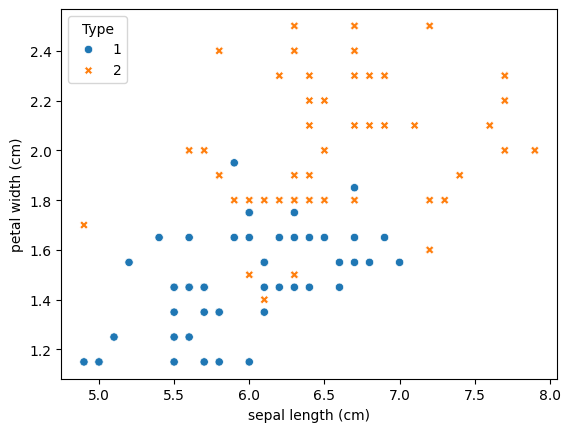

In [41]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'petal width (cm)', hue = 'Type',
                style = 'Type', palette = 'tab10')

In [42]:
X = iris_df.drop(['Type'], axis = 1)
y = iris_df[['Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13456)

clf = RandomForestClassifier(random_state = seed, oob_score = True)

y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f"OOB Score: {clf.oob_score_}")
print('Accuracy: ' + str(clf.score(X_test, y_test)))

OOB Score: 0.9285714285714286
Accuracy: 0.8333333333333334


d:\programing\Python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [43]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.73      0.92      0.81        12
           2       0.93      0.78      0.85        18

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.85      0.83      0.84        30



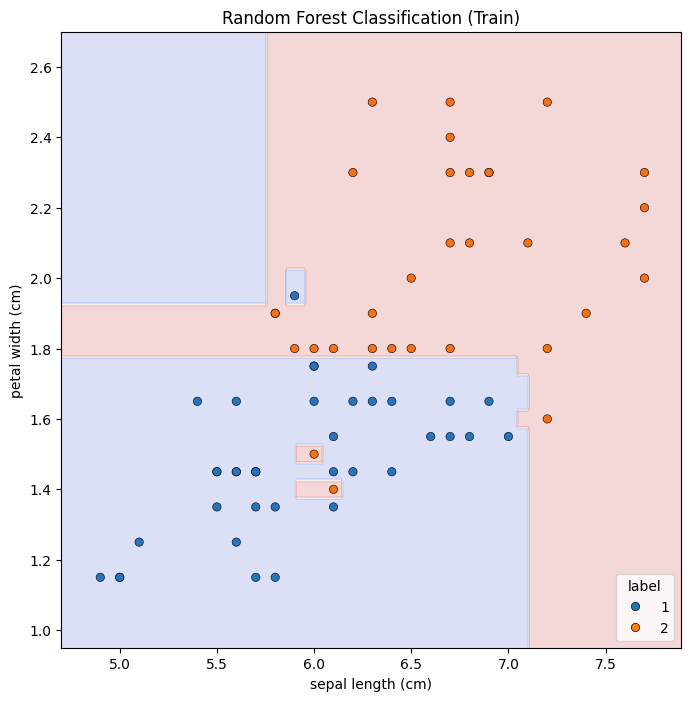

In [44]:
import sys
sys.path.append("../..")

from ToolKit.ML import plot_decision_boundary2F2D

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Random Forest Classification (Train)')

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

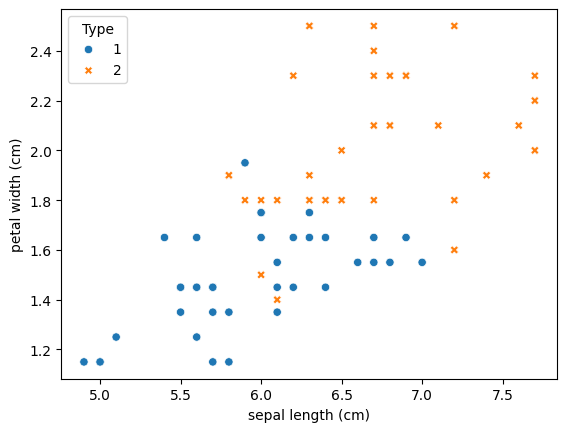

In [45]:
temp_df = X_train.join(y_train)
sns.scatterplot(data = temp_df, x = 'sepal length (cm)', y = 'petal width (cm)', hue = 'Type',
                style = 'Type', palette = 'tab10')

In [46]:
importance = clf.feature_importances_

importance

array([0.28204942, 0.71795058])

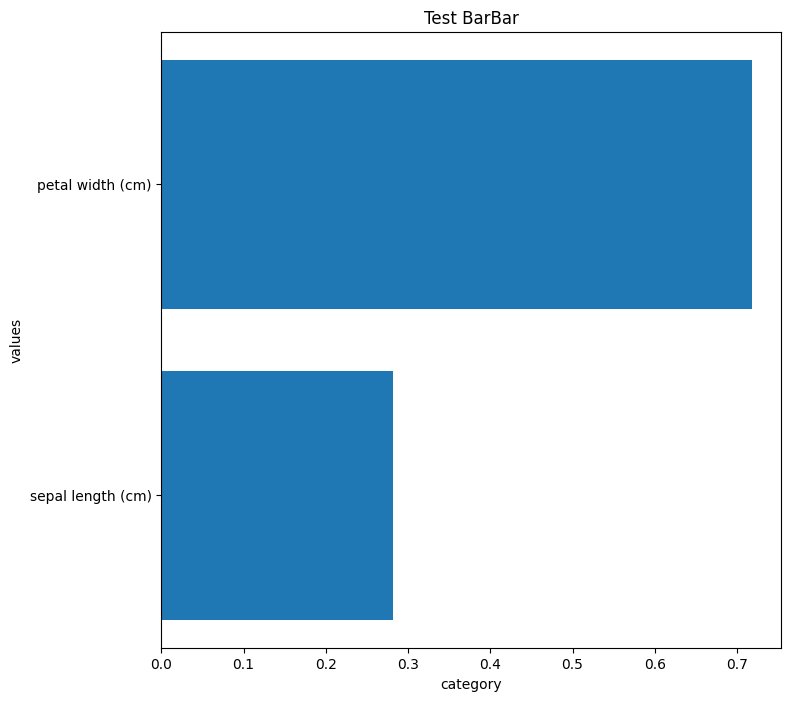

In [47]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.barh(y = X_train.columns, width = importance)

ax.set_title('Test BarBar')
ax.set_xlabel('category')
ax.set_ylabel('values')

plt.show()

## 调整参数

### 设置森林大小为30颗树，深度为3

d:\programing\Python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


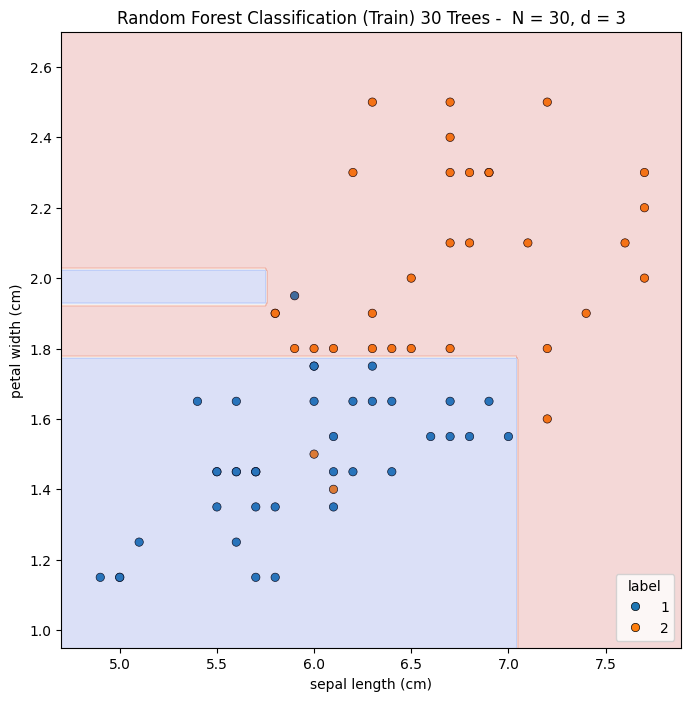

In [48]:
clf = RandomForestClassifier(n_estimators = 30,
                             max_depth = 3,
                             random_state = seed)

y_pred = clf.fit(X_train, y_train).predict(X_test)

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Random Forest Classification (Train) 30 Trees -  N = 30, d = 3')

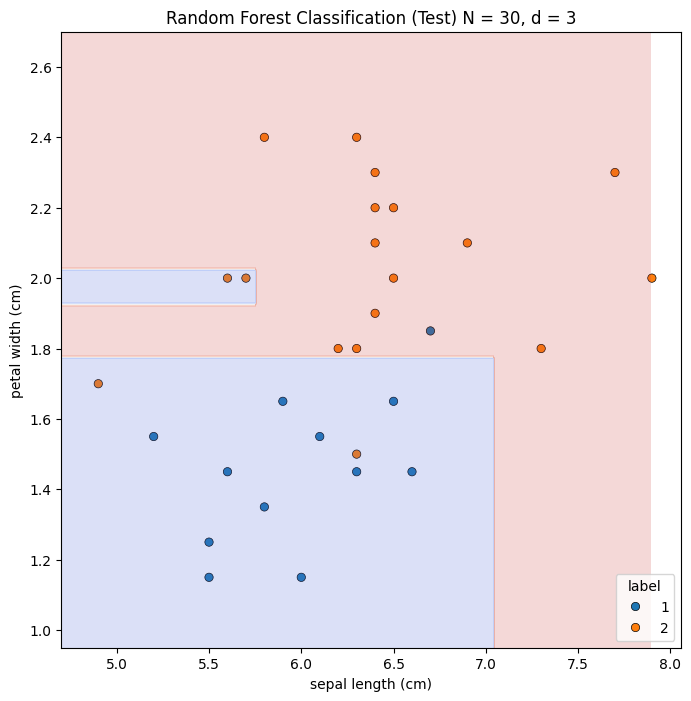

In [49]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'test', 'Random Forest Classification (Test) N = 30, d = 3')

In [50]:
print('Train Accuracy: {}'.format(clf.score(X_train, y_train)))
print('Test Accuracy: {}'.format(clf.score(X_test, y_test)))

Train Accuracy: 0.9571428571428572
Test Accuracy: 0.8333333333333334


d:\programing\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\programing\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### 森林大小为30，深度为2

d:\programing\Python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


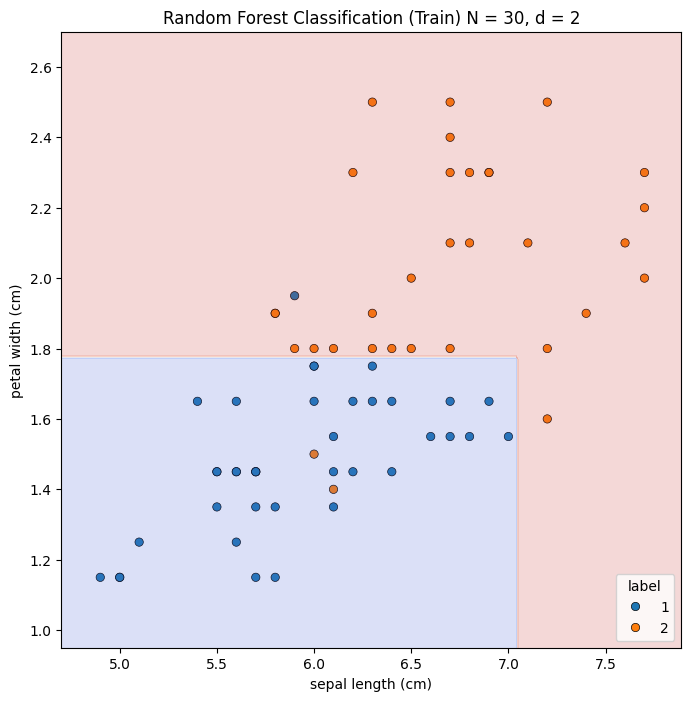

In [51]:
clf = RandomForestClassifier(n_estimators = 30,
                             max_depth = 2,
                             random_state = seed)

y_pred = clf.fit(X_train, y_train).predict(X_test)

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Random Forest Classification (Train) N = 30, d = 2')

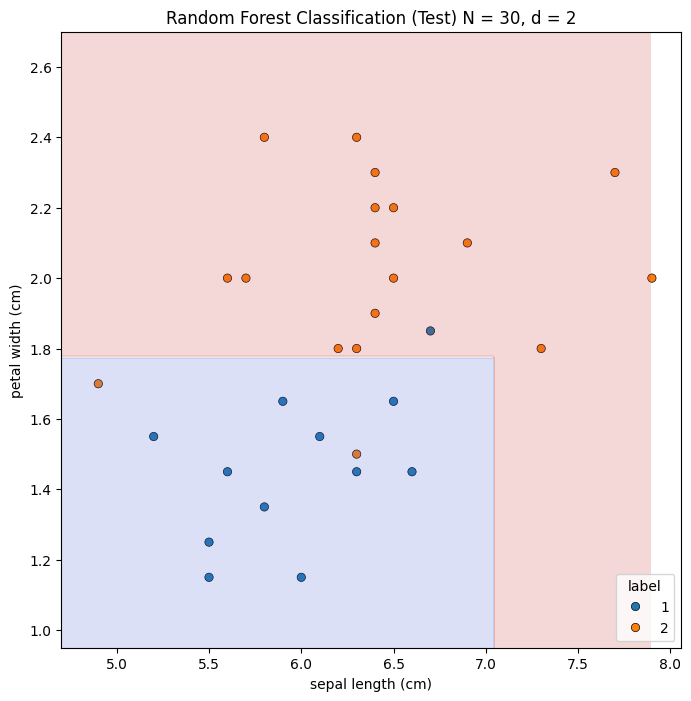

In [52]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'test', 'Random Forest Classification (Test) N = 30, d = 2')

In [53]:
print('Train Accuracy: {}'.format(clf.score(X_train, y_train)))
print('Test Accuracy: {}'.format(clf.score(X_test, y_test)))

Train Accuracy: 0.9571428571428572
Test Accuracy: 0.9


d:\programing\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\programing\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
